In [175]:
# Bond valuation and analysis using python

In [197]:
# importing all the neccessary libraies
import pandas as pd 
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

In [198]:
# Defining date range
start_date = '2024-01-01'
end_date =  '2024-12-31'

In [199]:
# fetching Moody's Aaa corprate bond DAAA

Bond_aaa_yield = web.DataReader('DAAA', 'fred', start_date, end_date)

Bond_aaa_yield


                    

,DAAA
DATE,
2024-01-01,NaN
2024-01-02,4.75
2024-01-03,4.75
2024-01-04,4.85
2024-01-05,4.89
...,...
2024-12-25,NaN
2024-12-26,5.35
2024-12-27,5.39


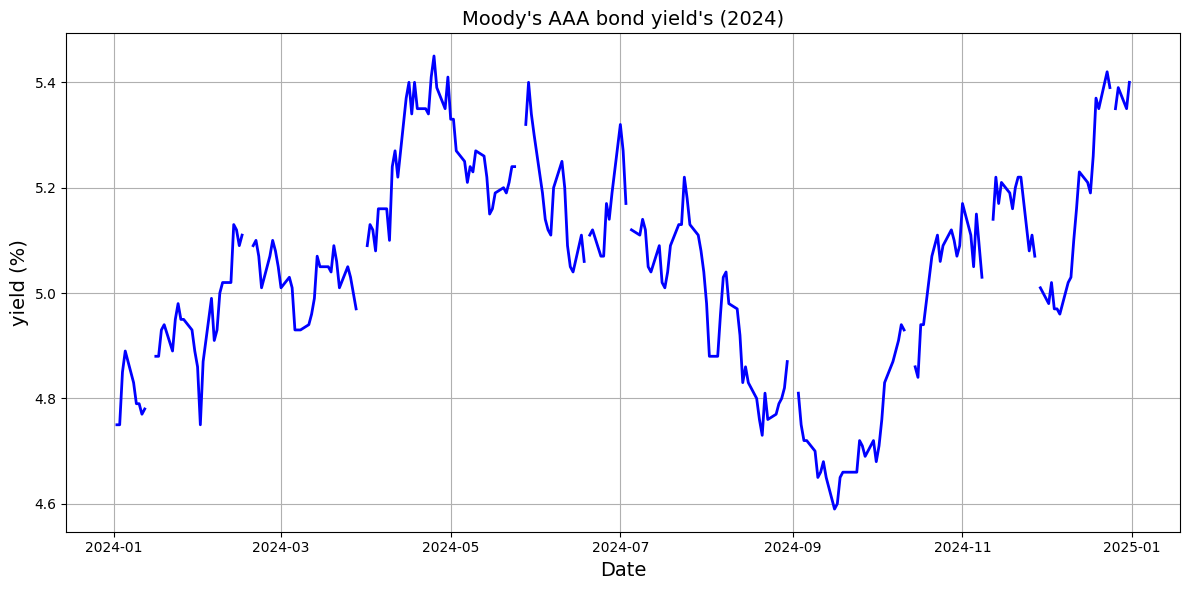

In [200]:
# Showing yield volatility during one year 
plt.figure(figsize=(12,6))
plt.plot(Bond_aaa_yield.index, Bond_aaa_yield['DAAA'], color = 'blue', linewidth = 2)
plt.title("Moody's AAA bond yield's (2024)", fontsize = 14)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("yield (%)", fontsize = 14)

plt.grid(True)
plt.tight_layout()

plt.show()



In [201]:
# parsing data inorder calculate average yield 
data = {
    "DATE": ["2024-01-01", "2024-01-02", "2024-01-03", "2024-01-04", "2024-01-05", "2024-12-25", "2024-12-26", "2024-12-27", "2024-12-30", "2024-12-31"],
    "DAAA": [None, 4.75, 4.75, 4.85, 4.89, None, 5.35, 5.39, 5.35, 5.40]
}

In [202]:
yield_2024 = pd.DataFrame(data)
mean_yield = yield_2024['DAAA'].mean()
yield_2024 = yield_2024['DAAA'].fillna(mean_yield)

bond_yield = yield_2024.mean()/100

print(bond_yield)



0.0509125


In [203]:
# Assuming bond price = 100, coupon rate = 3%, YTM = 8 years and yield = 0.0509125
## creating function to calculate bond price
def bond_price(r, p, ttm, y):
    cf = [p*r] * (ttm -1) + [p*(1+r)]
    t = range(1, ttm +1)
    pv_factor = [(1/(1+y))**ti for ti in t]
    pv = [cf_i * pv_i for cf_i, pv_i in zip(cf, pv_factor)]
    return sum(pv)

In [204]:
# Calculate bond price when no change to yield
px = bond_price(0.03, 100, 8, bond_yield)
px

86.53352336704306

In [205]:
# Calculate bond price when yield decreases by 1 %
px_down = bond_price(0.03, 100, 8, bond_yield - 0.01)
px_down

92.68049682339355

In [206]:
# Calculate bond price when yield increases by 1%
px_up = bond_price(0.03, 100, 8, bond_yield + 0.01)
px_up

80.87310867446242

In [207]:
# Calculating duration, to understand bond price senstivity in relation to interest rate change
duration = (px_down - px_up) / (2 * px * 0.01)
duration

6.822435796846376

In [208]:
# Percent change in price due to duration

duration_pct_change = -duration * 0.01
duration_pct_change

-0.06822435796846377

In [209]:
# Dollar impact of the duration effect
duration_dollar_change = duration_pct_change * px
duration_dollar_change

-5.9036940744655695

In [210]:
#Convexity measures the curvature in the bond price-yield relationship, indicating how the bond's duration changes as interest rates move. 
convexity = ((px_up + px_down) - 2 * px) / (px * 0.01**2)
convexity

56.22777680114356

In [211]:
convexity_pct_change = 0.5 * convexity * 0.01**2
convexity_pct_change

0.002811388840057178

In [212]:
convexity_dollar_change = convexity_pct_change * px
convexity_dollar_change

0.2432793818849319

In [213]:
# Estimate price_change
price_change = duration_dollar_change + convexity_dollar_change
price_change

-5.660414692580638

In [214]:
# Estimate new price
new_price = price_change + px
new_price

80.87310867446243

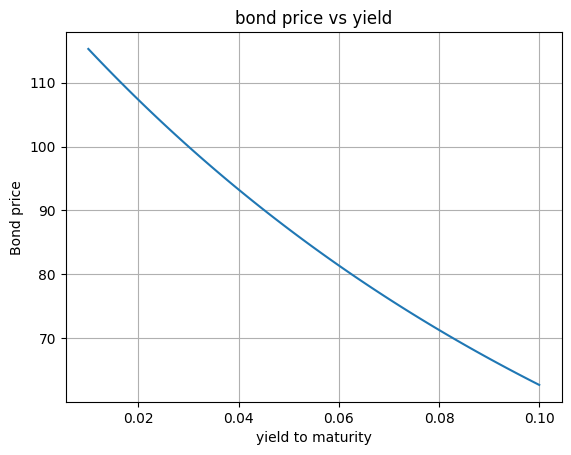

In [215]:
yields = np.linspace(0.01, 0.10, 100)
prices = [bond_price(0.03, 100, 8, y) for y in yields]

plt.plot(yields, prices)
plt.title("bond price vs yield")
plt.xlabel('yield to maturity')
plt.ylabel('Bond price')
plt.grid(True)
plt.show()

In [216]:
duration_line = px - duration * (yields - bond_yield) *px
convexity_line = duration_line + 0.5 * convexity * px * ((yields - bond_yield)**2)

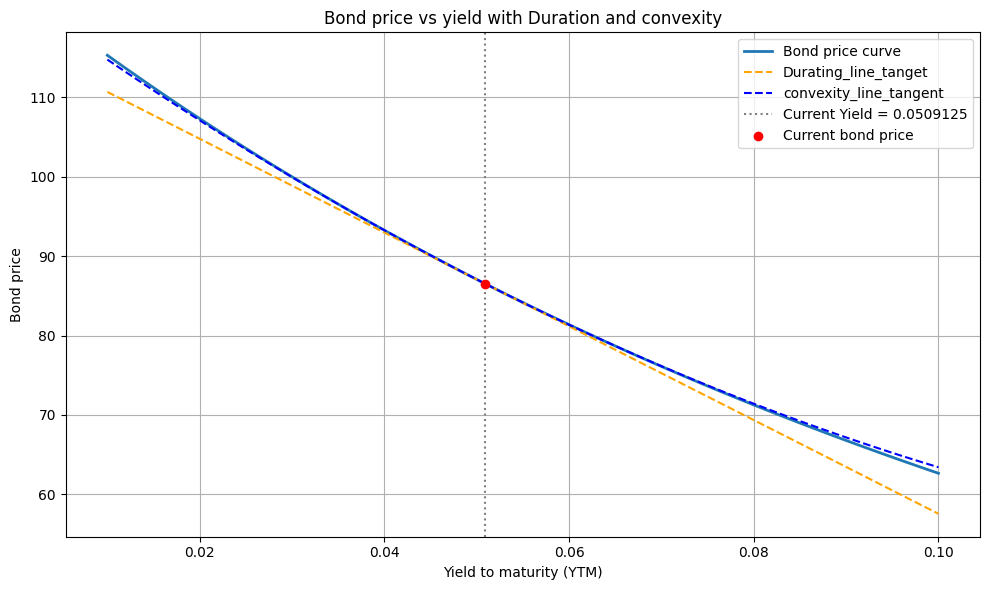

In [217]:
plt.figure(figsize=(10,6))
plt.plot(yields, prices, label = "Bond price curve", linewidth=2)
plt.plot(yields, duration_line, '--', label = 'Durating_line_tanget', color = 'orange')
plt.plot(yields, convexity_line, '--', label = 'convexity_line_tangent', color = 'blue')
plt.axvline(bond_yield, color = 'gray', linestyle = ':', label = f'Current Yield = {bond_yield:.7f}')
plt.scatter([bond_yield], [px], color = 'red', label = 'Current bond price', zorder = 5)


# lables

plt.title("Bond price vs yield with Duration and convexity")
plt.xlabel("Yield to maturity (YTM)")
plt.ylabel("Bond price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()